# Visualizing distributions of data

An early step in any effort to analyze or model data should be to understand how the variables are distributed. Techniques for distribution visualization can provide quick answers to many important questions. What range do the observations cover? What is their central tendency? Are they heavily skewed in one direction? Is there evidence for bimodality? Are there significant outliers? Do the answers to these questions vary across subsets defined by other variables?

The `distributions module` contains several functions designed to answer questions such as these. The axes-level functions are `histplot`, `kdeplot`, `ecdfplot`, and `rugplot`. They are grouped together within the figure-level `displot`, `jointplot`, and `pairplot` functions.

There are several different approaches to visualizing a distribution, and each has its relative advantages and drawbacks. It is important to understand these factors so that you can choose the best approach for your particular aim.

In [1]:
%matplotlib inline
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt

## Plotting univariate histograms
------------------------------

Perhaps the most common approach to visualizing a distribution is the *histogram*. This is the default approach in `displot`, which uses the same underlying code as `histplot`. A histogram is a bar plot where the axis representing the data variable is divided into a set of discrete bins and the count of observations falling within each bin is shown using the height of the corresponding bar:

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
#explore the data
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


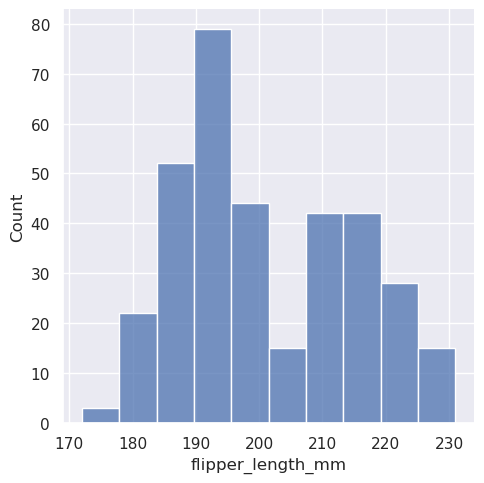

In [4]:
# Create a histogram of flipper lengths
sns.displot(penguins, x="flipper_length_mm") #data, x-axis column name

This plot immediately affords a few insights about the ``flipper_length_mm`` variable. For instance, we can see that the most common flipper length is about 195 mm, but the distribution appears bimodal, so this one number does not represent the data well.

### Choosing the bin size

The size of the bins is an important parameter, and using the wrong bin size can mislead by obscuring important features of the data or by creating apparent features out of random variability. By default, `displot`/`histplot` choose a default bin size based on the variance of the data and the number of observations. But you should not be over-reliant on such automatic approaches, because they depend on particular assumptions about the structure of your data. It is always advisable to check that your impressions of the distribution are consistent across different bin sizes. To choose the size directly, set the `binwidth` parameter:

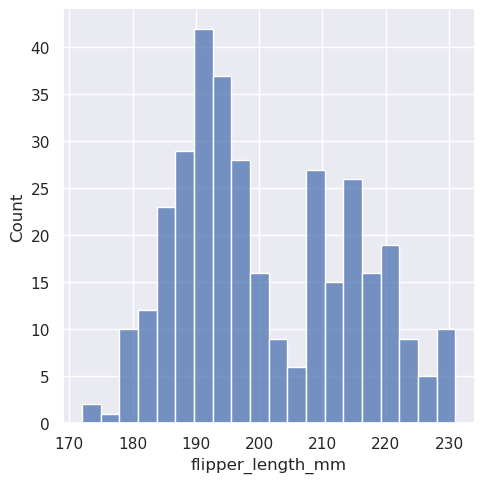

In [5]:
# Create a histogram with a specified bin width
sns.displot(penguins, x="flipper_length_mm", #dataframe, x-axis column name
            binwidth=3) #specify bin width, 3 relates to the unit of measurement, each bin is 3 mm wide

In other circumstances, it may make more sense to specify the *number* of bins, rather than their size:

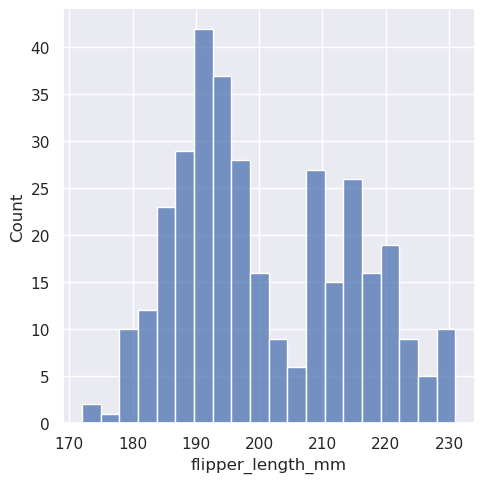

In [6]:
# Create a histogram with a specified number of bins
sns.displot(penguins, x="flipper_length_mm", #dataframe, x-axis column name
            bins=20) #specify number of bins

One example of a situation where defaults fail is when the variable takes a relatively small number of integer values. In that case, the default bin width may be too small, creating awkward gaps in the distribution:

In [7]:
tips = sns.load_dataset("tips")
print(tips.info())
tips.head()\
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
tips['size'].unique()

array([2, 3, 4, 1, 6, 5])

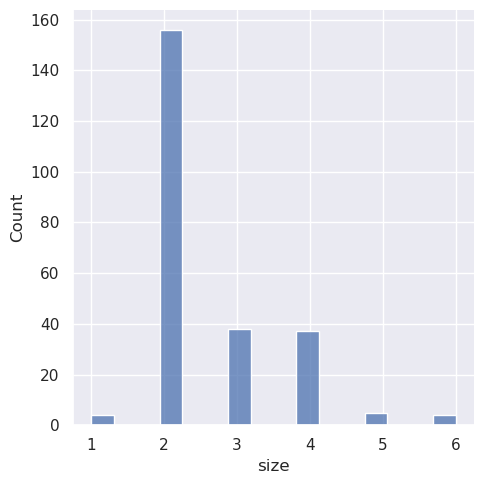

In [9]:
# Create a histogram of party sizes
sns.displot(tips, x="size") #data, x-axis column name

One approach would be to specify the precise bin breaks by passing an array to ``bins``:

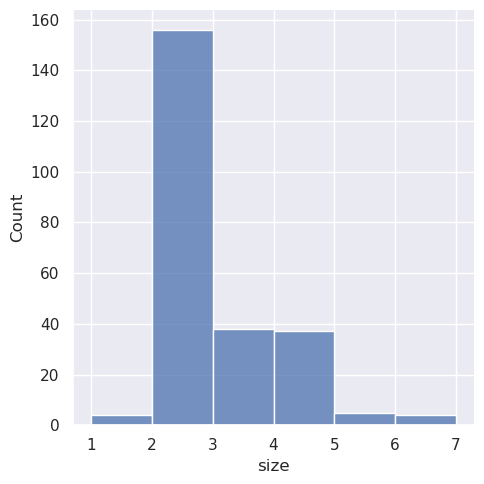

In [10]:
sns.displot(tips, x="size", #dataframe, x-axis column name
            bins=[1, 2, 3, 4, 5, 6, 7]) #specify bin edges, we want each bin to represent a single party size, we label to 7 because there are some parties of size 6

This can also be accomplished by setting ``discrete=True``, which chooses bin breaks that represent the unique values in a dataset with bars that are centered on their corresponding value.

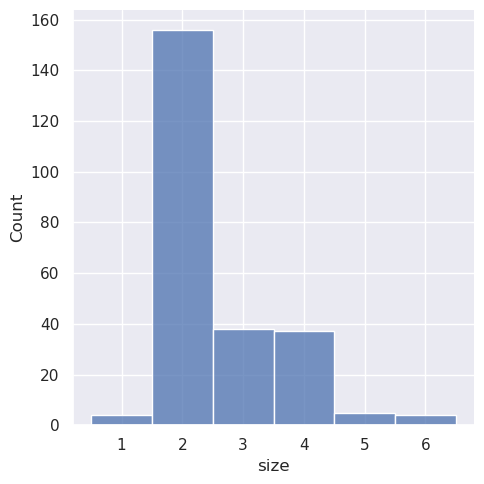

In [11]:
sns.displot(tips, x="size",#dataframe, x-axis column name
            discrete=True) #indicate that the variable is discrete, discrete means that it can only take certain values (like integers)

It's also possible to visualize the distribution of a categorical variable using the logic of a histogram. Discrete bins are automatically set for categorical variables, but it may also be helpful to "shrink" the bars slightly to emphasize the categorical nature of the axis:

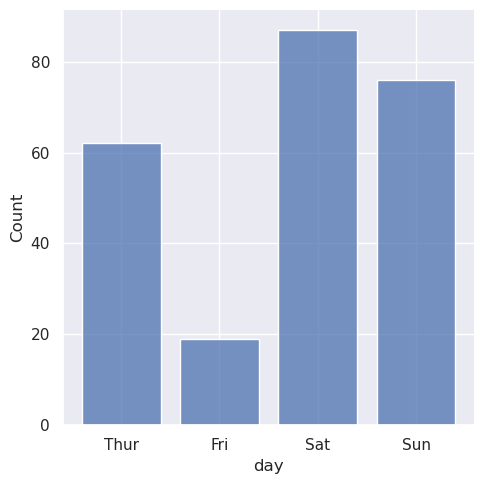

In [12]:
# Create a histogram of days of the week
sns.displot(tips, x="day", #dataframe, x-axis column name. x is categorical here
            shrink=.8)#shrink the bars to 80% of their default width so they don't touch

## Conditioning on other variables

Once you understand the distribution of a variable, the next step is often to ask whether features of that distribution differ across other variables in the dataset. For example, what accounts for the bimodal distribution of flipper lengths that we saw above? `displot` and `histplot` provide support for conditional subsetting via the ``hue`` semantic. Assigning a variable to ``hue`` will draw a separate histogram for each of its unique values and distinguish them by color:

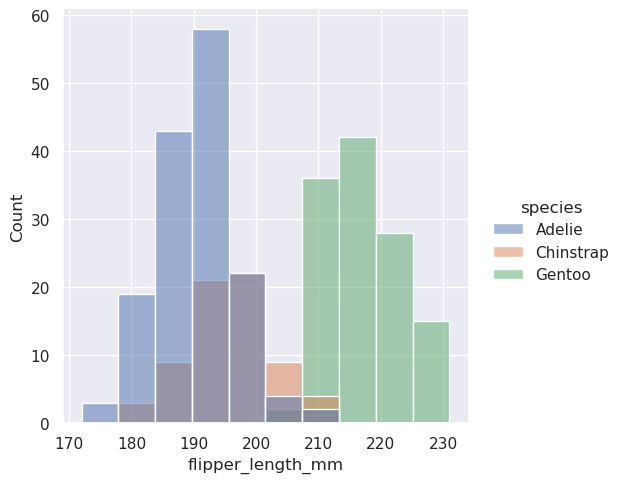

In [13]:
# Create a histogram of flipper lengths by species
sns.displot(penguins, x="flipper_length_mm", #dataframe, x-axis column name
            hue="species")#different colors for different species

By default, the different histograms are "layered" on top of each other and, in some cases, they may be difficult to distinguish. One option is to change the visual representation of the histogram from a bar plot to a "step" plot:

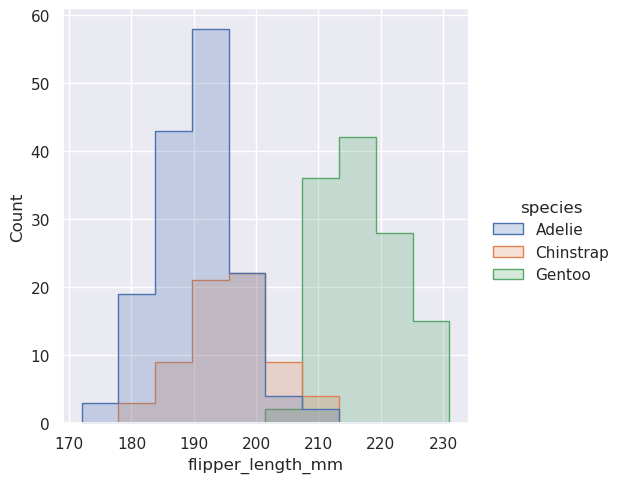

In [14]:
# Create a stepped histogram of flipper lengths by species
sns.displot(penguins, x="flipper_length_mm", #dataframe, x-axis column name
            hue="species", #different colors for different species
            element="step") #make the histogram stepped

Alternatively, instead of layering each bar, they can be "stacked", or moved vertically. In this plot, the outline of the full histogram will match the plot with only a single variable:

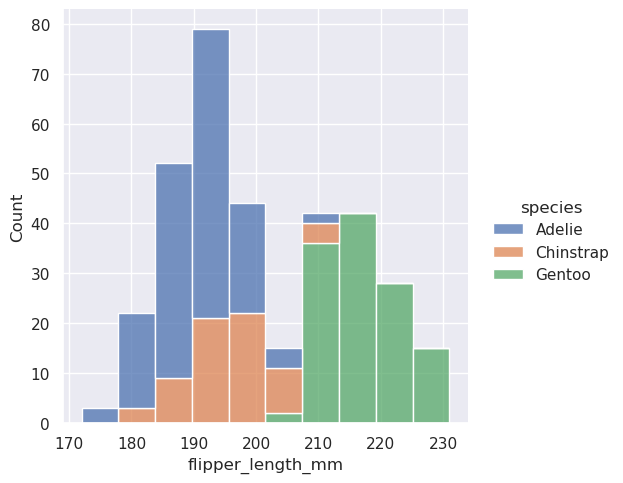

In [15]:
# Create a stacked histogram of flipper lengths by species
sns.displot(penguins, x="flipper_length_mm", #dataframe, x-axis column name
            hue="species",  #different colors for different species
            multiple="stack") #make the histogram stacked

The stacked histogram emphasizes the part-whole relationship between the variables, but it can obscure other features (for example, it is difficult to determine the mode of the Adelie distribution). Another option is "dodge" the bars, which moves them horizontally and reduces their width. This ensures that there are no overlaps and that the bars remain comparable in terms of height. But it only works well when the categorical variable has a small number of levels:

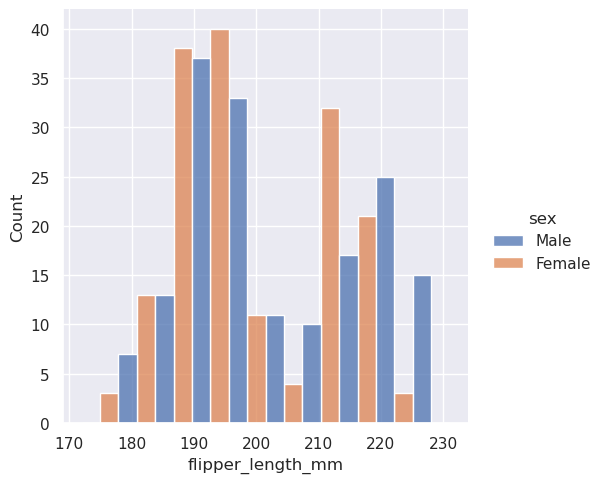

In [16]:
# Create a dodged histogram of flipper lengths by sex
sns.displot(penguins, x="flipper_length_mm", #dataframe, x-axis column name
            hue="sex", #different colors for different sexes
            multiple="dodge") #make the histogram dodged, dodged means side-by-side in this case

Because `displot` is a figure-level function and is drawn onto a `FacetGrid`, it is also possible to draw each individual distribution in a separate subplot by assigning the second variable to ``col`` or ``row`` rather than (or in addition to) ``hue``. This represents the distribution of each subset well, but it makes it more difficult to draw direct comparisons. Addres this by adding back some of the other elements, e.g., ``hue`` and ``element``.

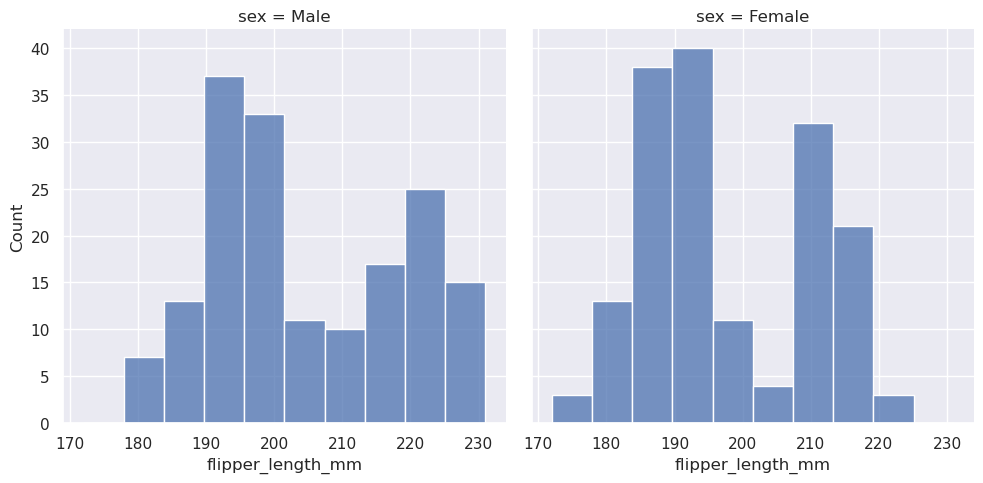

In [17]:
# Create separate histograms of flipper lengths for each sex
sns.displot(penguins, x="flipper_length_mm", #dataframe, x-axis column name
            #hue='species', #different colors for different species
            #element="step", #make the histogram stepped
            col="sex") #create a separate subplot for each, change to row="sex" to stack vertically

None of these approaches are perfect, and  we will soon see some alternatives to a histogram that are better-suited to the task of comparison.

## Normalized histogram statistics

Before we do, another point to note is that, when the subsets have unequal numbers of observations, comparing their distributions in terms of counts may not be ideal. One solution is to *normalize* the counts using the ``stat`` parameter:

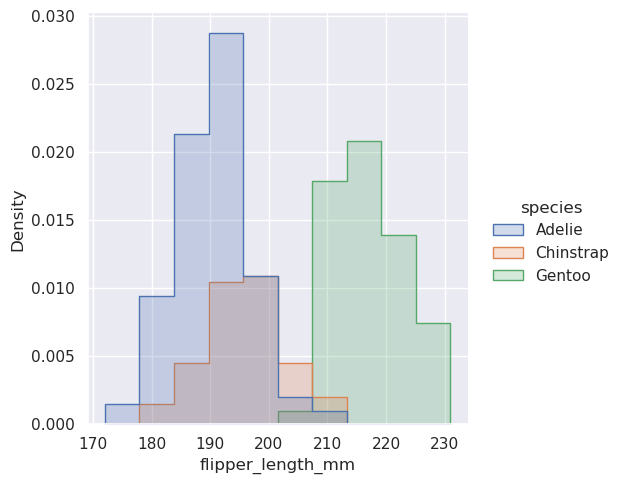

In [18]:
# Create a density histogram of flipper lengths by species
sns.displot(penguins, x="flipper_length_mm", 
            hue="species", #different colors for different species
            element="step", #make the histogram stepped
            stat="density")#normalize the histogram so that the area under the histogram sums to 1, all areas sum to 1 when combining species

By default, however, the normalization is applied to the entire distribution, so this simply rescales the height of the bars. By setting ``common_norm=False``, each subset will be normalized independently:

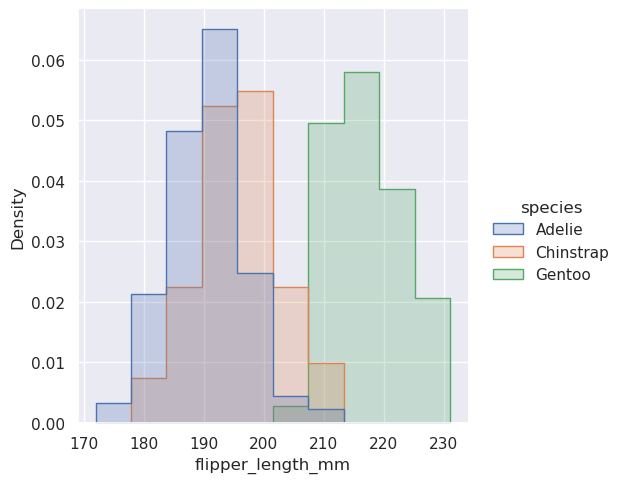

In [19]:
# Create a density histogram of flipper lengths by species without normalizing across species
sns.displot(penguins, x="flipper_length_mm", #dataframe, x-axis column name
            hue="species", #different colors for different species
            stat="density", #normalize the histogram so that the area under the histogram sums to 1
            common_norm=False, #do not normalize across species, the area under each species' histogram sums to 1 now
            element="step") #make the histogram stepped

Density normalization scales the bars so that their *areas* sum to 1. As a result, the density axis is not directly interpretable. Another option is to normalize the bars to that their *heights* sum to 1. This makes most sense when the variable is discrete, but  it is an option for all histograms:

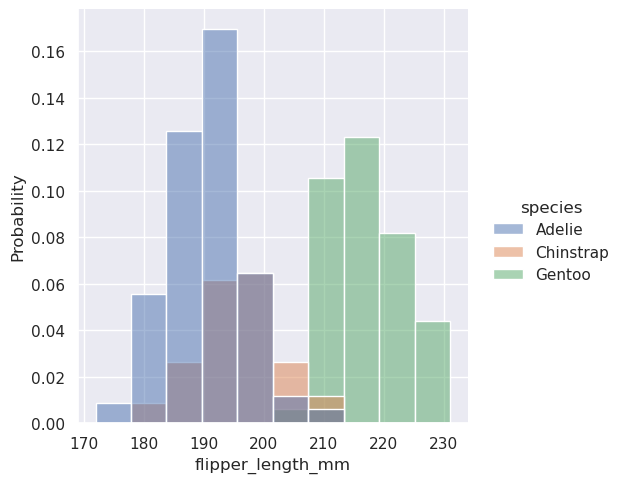

In [20]:
# Create a probability histogram of flipper lengths by species
sns.displot(penguins, x="flipper_length_mm",#dataframe, x-axis column name
            hue="species", #different colors for different species
            stat="probability")#normalize the histogram so that the total area sums to 1, all areas sum to 1 when combining species

## Kernel density estimation
-------------------------

A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:

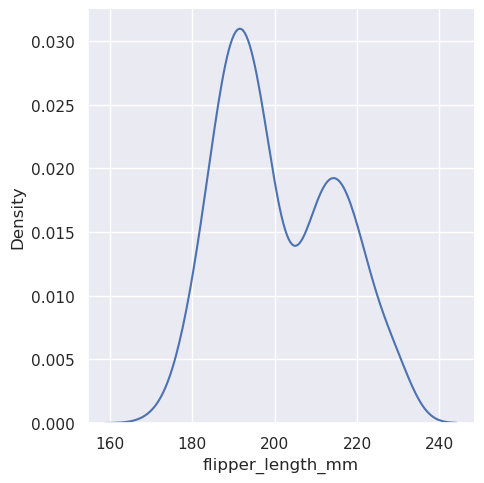

In [21]:
# Create a kernel density estimate plot of flipper lengths
sns.displot(penguins, x="flipper_length_mm", #dataframe, x-axis column name
            kind="kde")#specify that we want a KDE plot instead of a histogram

### Choosing the smoothing bandwidth

Much like with the bin size in the histogram, the ability of the KDE to accurately represent the data depends on the choice of smoothing bandwidth. An over-smoothed estimate might erase meaningful features, but an under-smoothed estimate can obscure the true shape within random noise. The easiest way to check the robustness of the estimate is to adjust the default bandwidth:

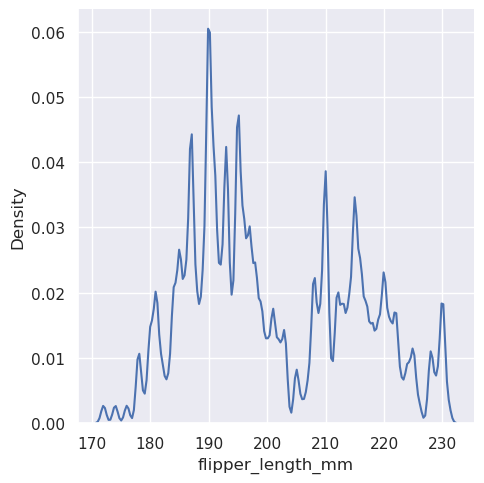

In [22]:
# Create a kernel density estimate plot of flipper lengths with adjusted bandwidth
sns.displot(penguins, x="flipper_length_mm", #dataframe, x-axis column name
            kind="kde", #specify that we want a KDE plot instead of a histogram
            bw_adjust=.10)#adjust the bandwidth to make the KDE more sensitive to small-scale variations, try values from 0.1 to 10

Note how the narrow bandwidth makes the bimodality much more apparent, but the curve is much less smooth. In contrast, a larger bandwidth obscures the bimodality almost completely:

### Conditioning on other variables

As with histograms, if you assign a ``hue`` variable, a separate density estimate will be computed for each level of that variable:

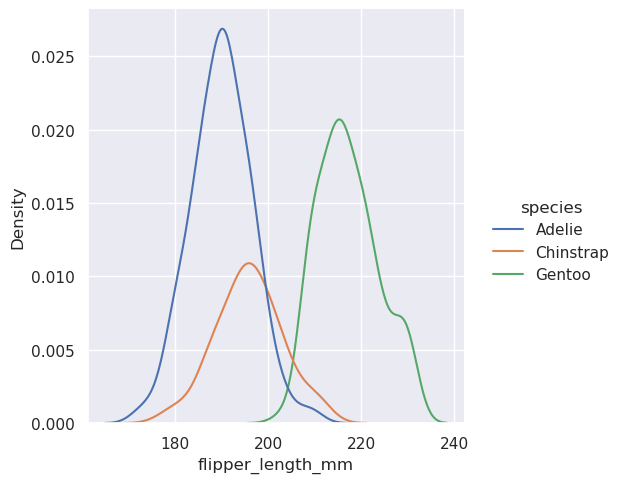

In [23]:
# Create a kernel density estimate plot of flipper lengths by species
sns.displot(penguins, x="flipper_length_mm", #dataframe, x-axis column name
            hue="species", # different colors for different species
            kind="kde")#specify that we want a KDE plot instead of a histogram

In many cases, the layered KDE is easier to interpret than the layered histogram, so it is often a good choice for the task of comparison. Many of the same options for resolving multiple distributions apply to the KDE as well:

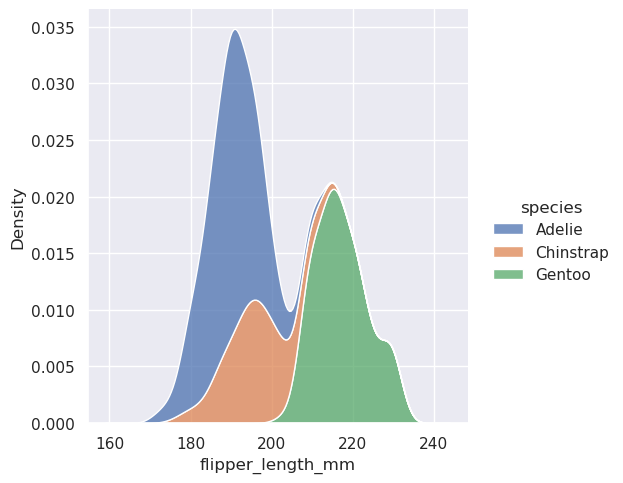

In [24]:
# Create a stacked kernel density estimate plot of flipper lengths by species
sns.displot(penguins, x="flipper_length_mm", #dataframe, x-axis column name
            hue="species",# different colors for different species
            kind="kde", #specify that we want a KDE plot instead of a histogram
            multiple="stack") #make the KDE stacked

Note how the stacked plot filled in the area between each curve by default. It is also possible to fill in the curves for single or layered densities, although the default alpha value (opacity) will be different, so that the indivi
dual densities are easier to resolve.

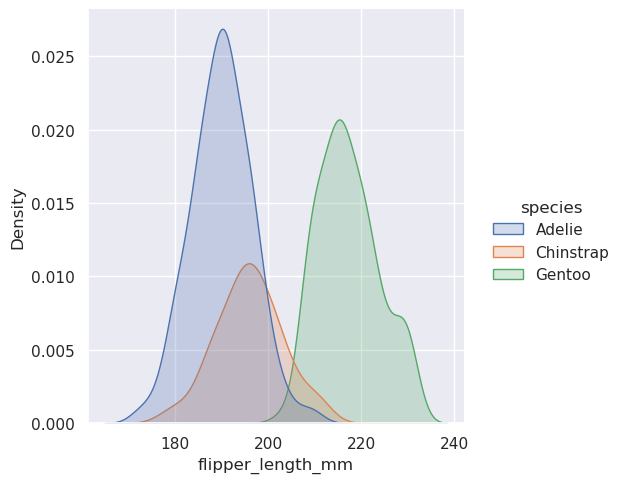

In [25]:
# Create a filled kernel density estimate plot of flipper lengths by species
sns.displot(penguins, x="flipper_length_mm", #dataframe, x-axis column name
            hue="species", #set the hue to species
            kind="kde", #specify that we want a KDE plot instead of a histogram
            fill=True)#fill the area under the KDE curves

### Kernel density estimation pitfalls

KDE plots have many advantages. Important features of the data are easy to discern (central tendency, bimodality, skew), and they afford easy comparisons between subsets. But there are also situations where KDE poorly represents the underlying data. This is because the logic of KDE assumes that the underlying distribution is smooth and unbounded. One way this assumption can fail is when a variable reflects a quantity that is naturally bounded. If there are observations lying close to the bound (for example, small values of a variable that cannot be negative), the KDE curve may extend to unrealistic values:

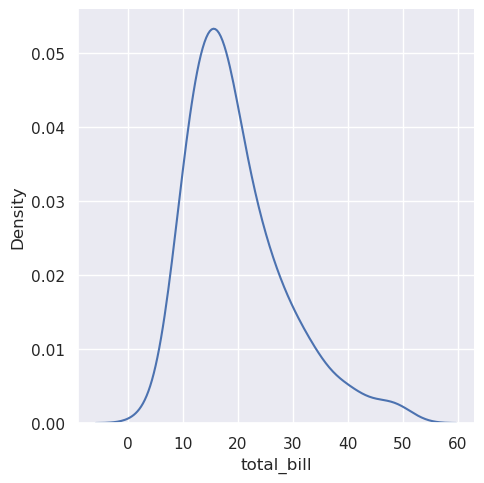

In [26]:
# Create a kernel density estimate plot of total bills
sns.displot(tips, x="total_bill", #dataframe, x-axis column name
            kind="kde")#specify that we want a KDE plot instead of a histogram, note how the lower limit is not zero - goes negative to unrealistic values

This can be partially avoided with the ``cut`` parameter, which specifies how far the curve should extend beyond the extreme datapoints. But this influences only where the curve is drawn; the density estimate will still smooth over the range where no data can exist, causing it to be artificially low at the extremes of the distribution:

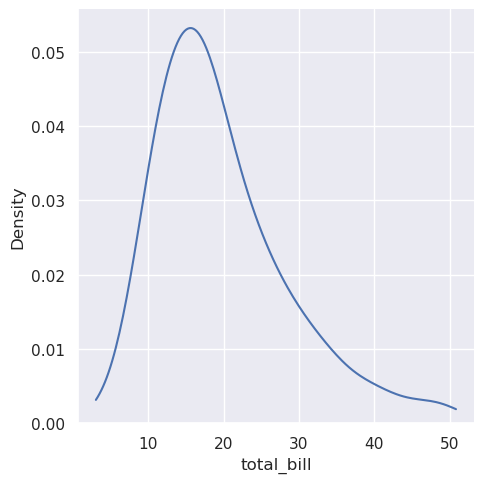

In [27]:
# Create a kernel density estimate plot of total bills with cut set to 0
sns.displot(tips, x="total_bill", #dataframe, x-axis column name
            kind="kde",#specify that we want a KDE plot instead of a histogram
            cut=0) #set cut to 0 so the KDE does not extend beyond the data range

The KDE approach also fails for discrete data or when data are naturally continuous but specific values are over-represented. The important thing to keep in mind is that the KDE will *always show you a smooth curve*, even when the data themselves are not smooth. For example, consider this distribution of diamond weights:


In [28]:
diamonds = sns.load_dataset("diamonds")
print(diamonds.info())
diamonds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


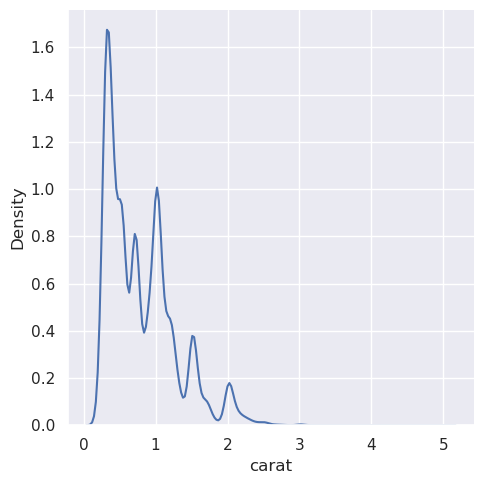

In [29]:
# Create a kernel density estimate plot of carat weights
sns.displot(diamonds, x="carat", #dataframe, x-axis column name
            kind="kde")#specify that we want a KDE plot instead of a histogram

While the KDE suggests that there are peaks around specific values, the histogram reveals a much more jagged distribution:

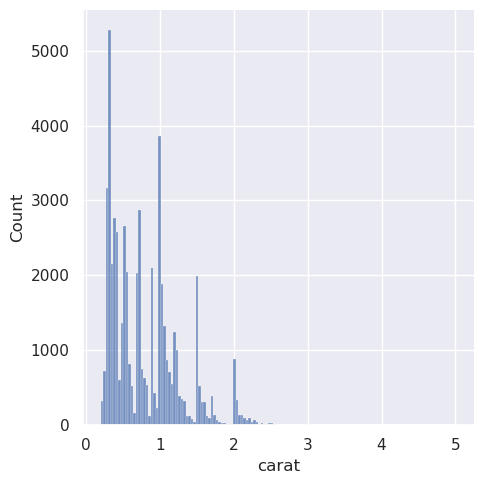

In [30]:
# Create a histogram of carat weights
sns.displot(diamonds, x="carat") #dataframe, x-axis column name

As a compromise, it is possible to combine these two approaches. While in histogram mode, `displot` (as with `histplot`) has the option of including the smoothed KDE curve (note ``kde=True``, not ``kind="kde"``):

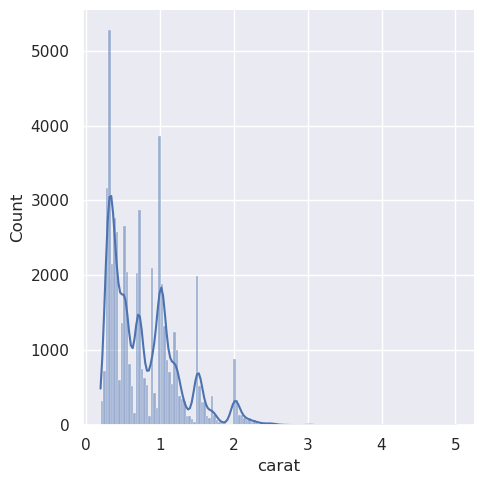

In [31]:
# Create a kernel density estimate plot of carat weights with KDE overlay
sns.displot(diamonds, x="carat", #dataframe, x-axis column name
            kde=True) #specify that we want a KDE plot overlaid over the histogram

## Empirical cumulative distributions
----------------------------------

A third option for visualizing distributions computes the "empirical **cumulative distribution function**" (ECDF). This plot draws a monotonically-increasing curve through each datapoint such that the height of the curve reflects the proportion of observations with a smaller value:

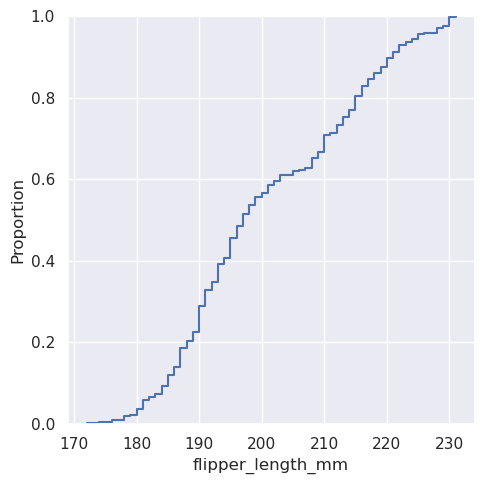

In [32]:
# Create an empirical cumulative distribution function (ECDF) plot of flipper lengths
sns.displot(penguins, x="flipper_length_mm", #dataframe, x-axis column name
            kind="ecdf")#specify that we want an ECDF plot

The ECDF plot has two key advantages. Unlike the histogram or KDE, it directly represents each datapoint. That means there is no bin size or smoothing parameter to consider. Additionally, because the curve is monotonically increasing, it is well-suited for comparing multiple distributions:

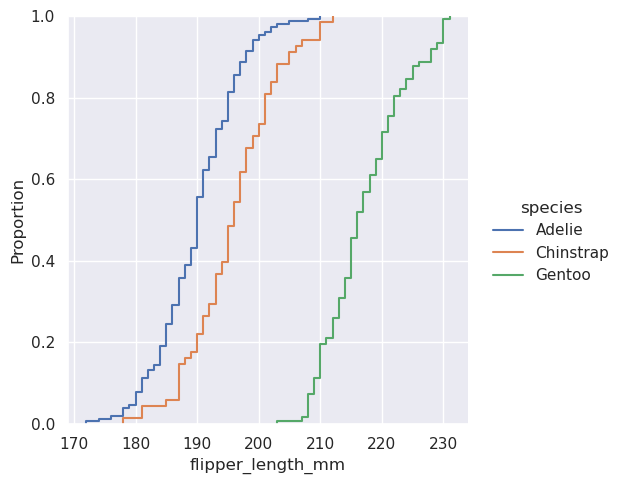

In [33]:
# Create an empirical cumulative distribution function (ECDF) plot of flipper lengths by species
sns.displot(penguins, x="flipper_length_mm", #dataframe, x-axis column name
            hue="species", #different colors for different species
            kind="ecdf") #specify that we want an ECDF plot

## Using for publication

This image uses the cdf ploting function to compare model performance of a snow model with different precipitation products

<img src="./Images/Precip_model_cdfs.png" alt="SnowPrecipModel" width="1000">

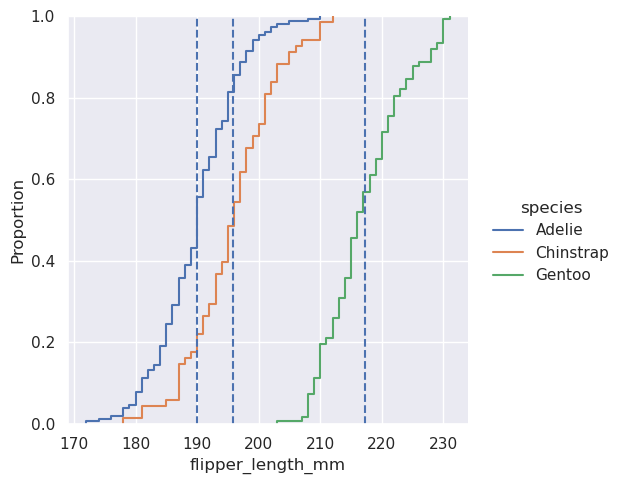

In [ ]:
# Create an empirical cumulative distribution function (ECDF) plot of flipper lengths by species with means

x_var = "flipper_length_mm"
hue_var = "species"

# Create the plot using Seaborn
g = sns.displot(data=penguins, x=x_var,#dataframe, x-axis column name. assign plot to g
                hue=hue_var,#different colors for different species
                kind="ecdf")#specify that we want an ECDF plot

# Calculate means and add vertical lines using Matplotlib
species_list = penguins[hue_var].unique()#get unique species
for i, species in enumerate(species_list): #loop over species
    species_mean = penguins[penguins[hue_var] == species][x_var].mean() #calculate mean flipper length for the species
    plt.axvline(species_mean, #add vertical line at the mean
                linestyle='--')#dashed line

plt.show()

The major downside to the ECDF plot is that it represents the shape of the distribution less intuitively than a histogram or density curve. Consider how the bimodality of flipper lengths is immediately apparent in the histogram, but to see it in the ECDF plot, you must look for varying slopes. Nevertheless, with practice, you can learn to answer all of the important questions about a distribution by examining the ECDF, and doing so can be a powerful approach.

## Visualizing bivariate distributions
-----------------------------------
So far have considered *univariate* distributions: distributions of a single variable, perhaps conditional on a second variable assigned to ``hue``. Assigning a second variable to ``y``, however, will plot a *bivariate* distribution:

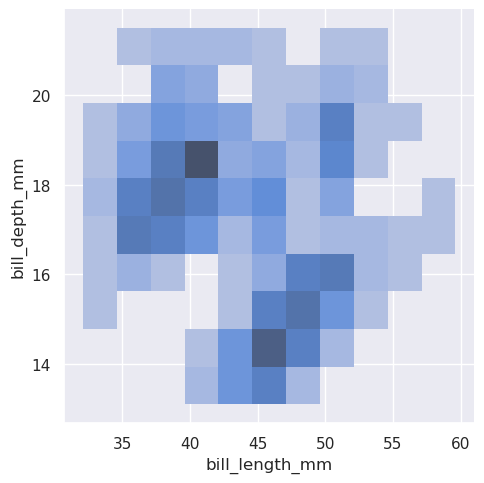

In [35]:
# Create a 2D histogram of bill length vs. bill depth
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm",
            #cbar=True #add a legend or color bar to indicate counts
            ) #dataframe, x-axis column name, y-axis column name, color intensity represents counts

A bivariate histogram bins the data within rectangles that tile the plot and then shows the count of observations within each rectangle with the fill color (analogous to a `heatmap`). Similarly, a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian. The default representation then shows the *contours* of the 2D density:

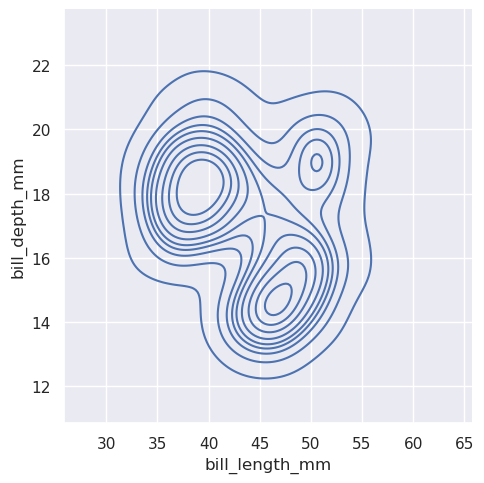

In [36]:
# Create a kernel density estimate plot of bill length vs. bill depth
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", #dataframe, x-axis column name, y-axis column name
            kind="kde", #specify that we want a KDE plot instead of a histogram
            #  fill=True,    # Fills the contours with color
            # cbar=True,    # Adds the color bar legend
            #  cmap="viridis" # Optional: a vibrant color palette) #specify that we want a KDE plot instead of a histogram
)

Assigning a ``hue`` variable will plot multiple heatmaps or contour sets using different colors. For bivariate histograms, this will only work well if there is minimal overlap between the conditional distributions:

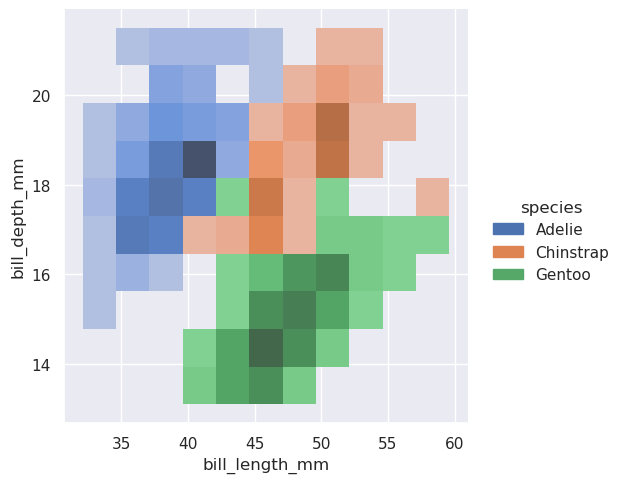

In [37]:
# Create a 2D histogram of bill length vs. bill depth by species
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm",#dataframe, x-axis column name, y-axis column name
            hue="species") #different colors for different species

The contour approach of the bivariate KDE plot lends itself better to evaluating overlap, although a plot with too many contours can get busy:

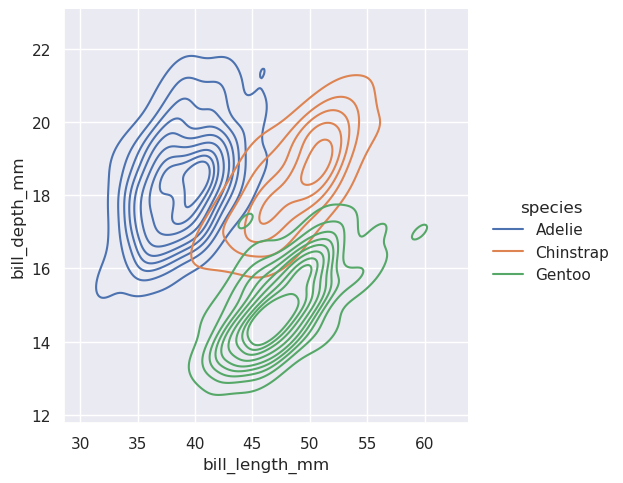

In [38]:
# Create a kernel density estimate plot of bill length vs. bill depth by species
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", #dataframe, x-axis column name, y-axis column name
            hue="species",# different colors for different species
            kind="kde",#specify that we want a KDE plot instead of a histogram
            #fill=True,    # Fills the contours with color
            )

Just as with univariate plots, the choice of bin size or smoothing bandwidth will determine how well the plot represents the underlying bivariate distribution. The same parameters apply, but they can be tuned for each variable by passing a pair of values:

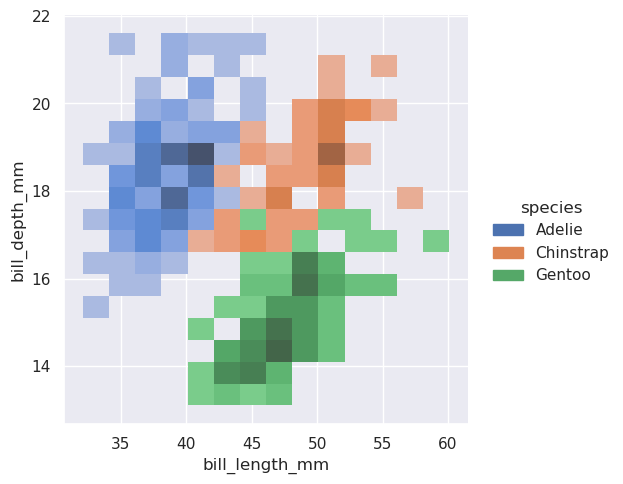

In [39]:
# Create a 2D histogram of bill length vs. bill depth with specified bin widths
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm",  #dataframe, x-axis column name, y-axis column name
            hue="species",# different colors for different species
            binwidth=(2, .5) #specify bin widths for x and y axes, try other bin widths
            )

To aid interpretation of the heatmap, add a colorbar to show the mapping between counts and color intensity:

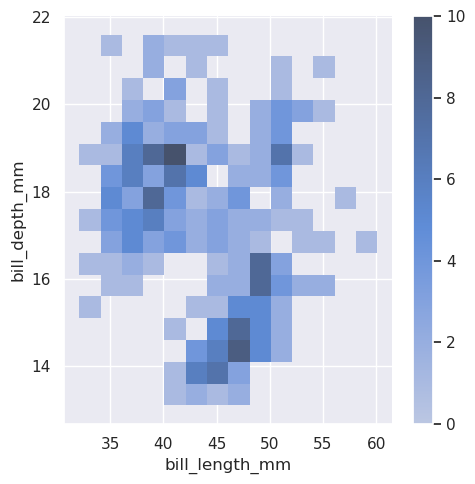

In [40]:
# Create a 2D histogram of bill length vs. bill depth with specified bin widths and color bar
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm",  #dataframe, x-axis column name, y-axis column name
            binwidth=(2, .5), #Set the bin widths for x and y axes
            cbar=True)#add a legend or color bar to indicate counts

The meaning of the bivariate density contours is less straightforward. Because the density is not directly interpretable, the contours are drawn at *iso-proportions* of the density, meaning that each curve shows a level set such that some proportion *p* of the density lies below it. The *p* values are evenly spaced, with the lowest level contolled by the ``thresh`` parameter and the number controlled by ``levels``:

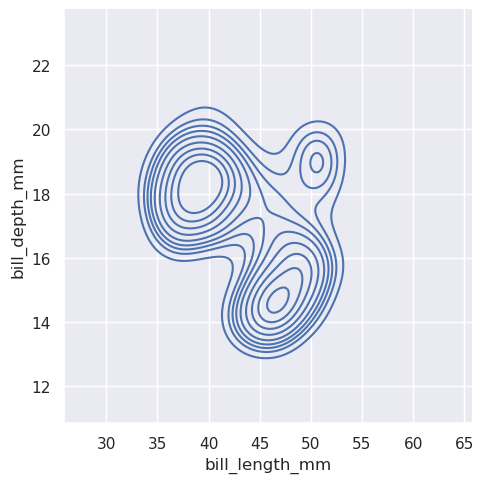

In [41]:
# Create a kernel density estimate plot of bill length vs. bill depth with thresholds and levels
g = sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", #dataframe, x-axis column name, y-axis column name
            kind="kde", #specify that we want a KDE plot instead of a histogram
            thresh=.2, #set threshold for the lowest contour level, adjust to see how it changes
            levels=10, #set the number of contour levels, adjust to see how it changes
             #fill=True,    # Fills the contours with color
            # cbar=True,    # Adds the color bar legend
             #cmap="viridis" # Optional: a vibrant color palette
)

#want to get more complex and add a label to the color bar?

# Access the color bar axis
# cbar_ax = g.figure.axes[-1]

# # Add the label
# # 'rotation=270' keeps the text vertical, 'labelpad' prevents overlapping with numbers
# cbar_ax.set_ylabel("Probability Density", rotation=270, labelpad=15)

g

The ``levels`` parameter also accepts a list of values, for more control:

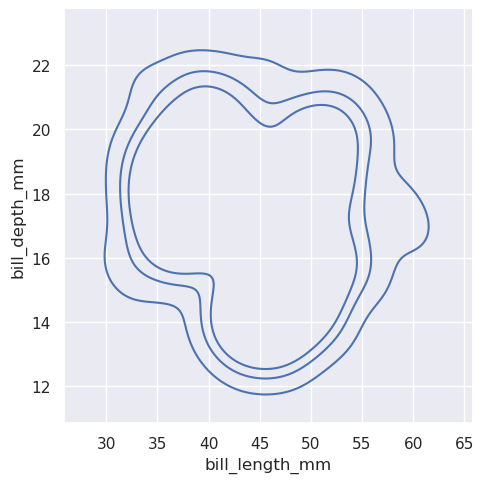

In [42]:
# Create a kernel density estimate plot of bill length vs. bill depth with specified levels
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", 
            kind="kde", 
            levels=[.01, .05, .1, 1], #specify contour levels, we created 3 levels at low, medium, and high density with bounds, adjust as needed
            # fill=True,    # Fills the contours with color
            # cbar=True,    # Adds the color bar legend
            # cmap="viridis" # Optional: a vibrant color palette
            )

The bivariate histogram allows one or both variables to be discrete. Plotting one discrete and one continuous variable offers another way to compare conditional univariate distributions:

In [43]:
print(diamonds.info())
diamonds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


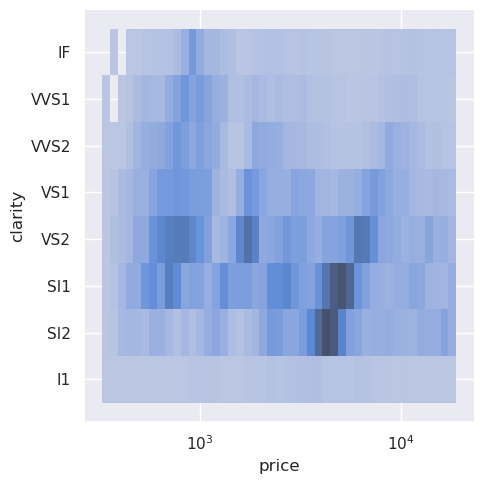

In [44]:
# Create a 2D histogram of diamond price vs. clarity with logarithmic x-axis
sns.displot(diamonds, x="price", y="clarity", #dataframe, x-axis column name, y-axis column name
            log_scale=(True, False), #set x-axis to logarithmic scale, leave y-axis linear, or categorical as it is here
            #cbar=True #add a legend or color bar to indicate counts
            )

In contrast, plotting two discrete variables is an easy to way show the cross-tabulation of the observations:

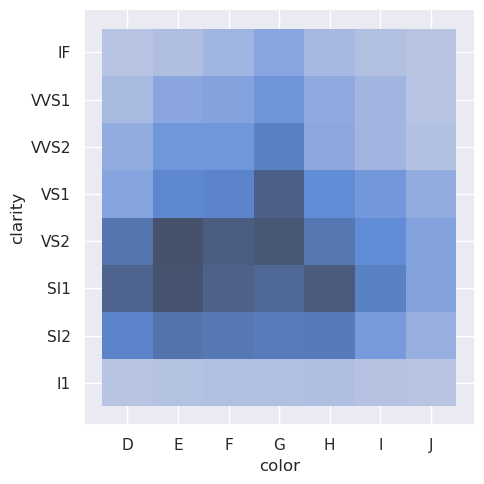

In [45]:
sns.displot(diamonds, x="color", y="clarity", #dataframe, x-axis column name, y-axis column name
            #cbar=True #add a legend or color bar to indicate counts
            )

## Distribution visualization in other settings
--------------------------------------------

Several other figure-level plotting functions in seaborn make use of the `histplot` and `kdeplot` functions.


### Plotting joint and marginal distributions

The first is `jointplot`, which augments a bivariate relational or distribution plot with the marginal distributions of the two variables. By default, `jointplot` represents the bivariate distribution using `scatterplot` and the marginal distributions using `histplot`:

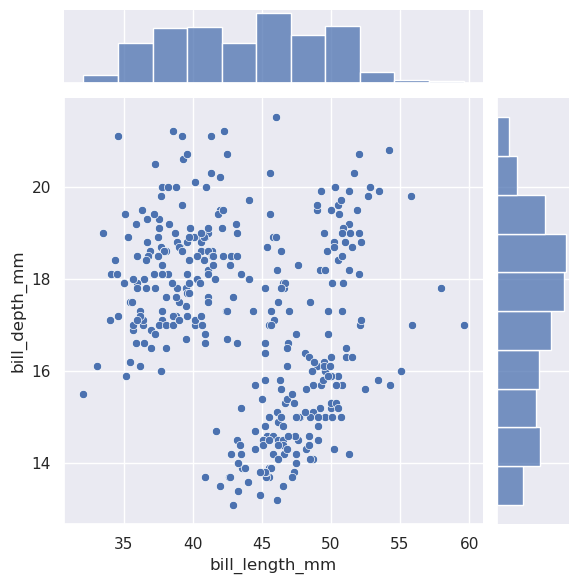

In [46]:
# Create a joint plot of bill length vs. bill depth, the main plot will be a scatter plot and the marginal plots will be histograms
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", #dataframe, x-axis column name, y-axis column name
              #hue="species" # set the hue to species, note how this adds changes the marginal plots to kde plots
              )

Similar to `displot`, setting a different ``kind="kde"`` in `jointplot` will change both the joint and marginal plots the use `kdeplot`:

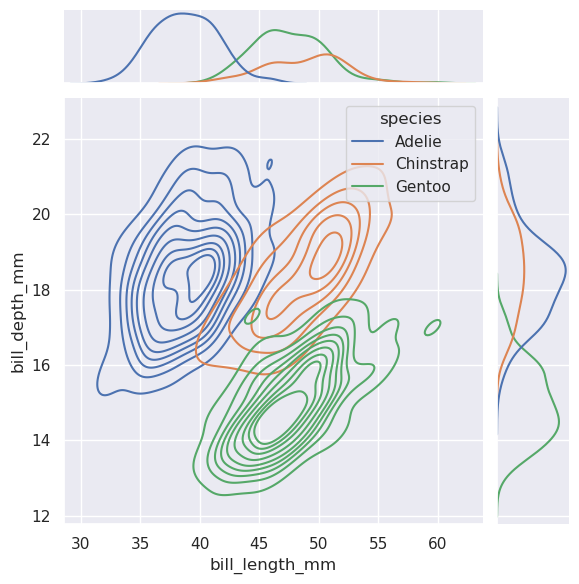

In [47]:
# Create a joint plot of bill length vs. bill depth with KDE kind, getting more complex with hue
sns.jointplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm",  #dataframe, x-axis column name, y-axis column name
    hue="species", # set the hue to species
    kind="kde" #specify that we want a KDE plot
)

`jointplot` is a convenient interface to the `JointGrid` class, which offeres more flexibility when used directly:

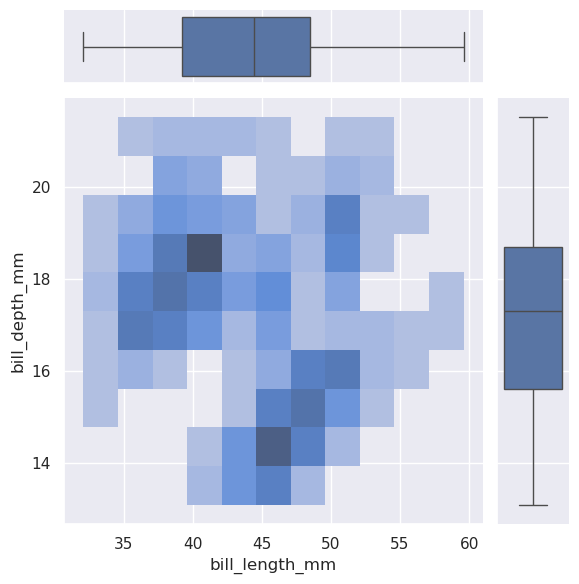

In [48]:
# Create a JointGrid of bill length vs. bill depth with customized joint and marginal plots
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm") #dataframe, x-axis column name, y-axis column name, assign plot to g                  )
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

The plot above provide lots of useful information, but a critical need is a legend to indicate the number of observations in the main plot:

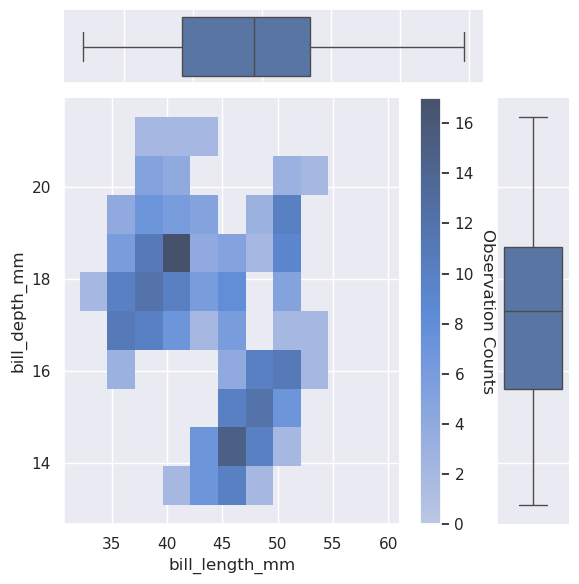

In [ ]:
# create a JointGrid of bill length vs. bill depth with customized joint and marginal plots, adding a color bar
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm") #dataframe, x-axis column name, y-axis column name, assign plot to g

#Add the histplot with cbar=True
g.plot_joint(sns.histplot, 
             cbar=True, #Adds the color bar legend to the histplot
             pthresh=0) # use pthresh=0 to ensure the background fills, 

# Add the marginal boxplots
g.plot_marginals(sns.boxplot)

# Add a label to the color bar
cbar_ax = g.figure.axes[-1] #get the color bar axis
cbar_ax.set_ylabel('Observation Counts', rotation=270, labelpad=15) #add label to color bar, set the rotation and labelpad for better positionin

g

This is great, now we have a cmap but its location is not ideal. We should have the boxplots directly connected to the figure and the cmap outside of them.

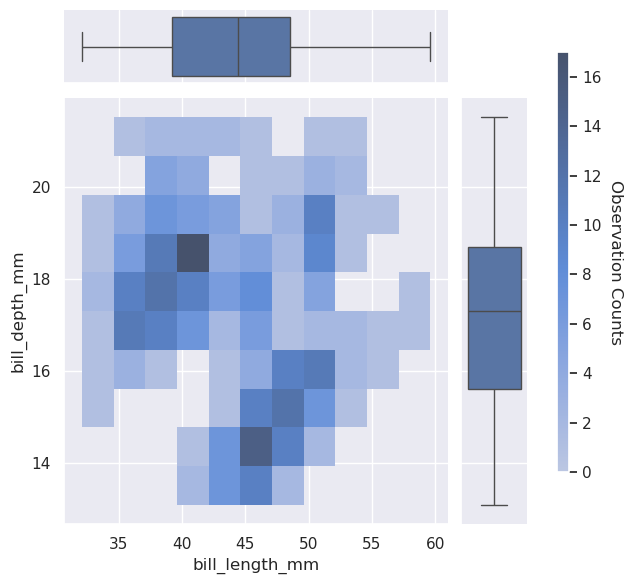

In [ ]:
# Create the JointGrid
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm") #dataframe, x-axis column name, y-axis column name

# Plot the joint and marginals 
g.plot_joint(sns.histplot,  cbar=False) # We set cbar=False here because we will add it manually to the right
g.plot_marginals(sns.boxplot) #add the marginal boxplots

# Create a new axis for the colorbar on the far right
cbar_ax = g.figure.add_axes([0.95, 0.2, 0.02, 0.7])  # [left, bottom, width, height] in figure coordinates, adjust to see how it changes the cbar location

# Grab the "mappable" from the histplot to create the colorbar
points = g.ax_joint.collections[0] if g.ax_joint.collections else g.ax_joint.get_children()[0] # Get the first collection (the histogram), index 0

#add the color bar to the new axis, points
g.figure.colorbar(points, cax=cbar_ax) #add color bar to new axis
cbar_ax.set_ylabel('Observation Counts', rotation=270, labelpad=15) #add label to color bar, set the rotation and labelpad for better positioning

# 5. Make room for the new axis so it doesn't overlap
g.figure.subplots_adjust(right=0.9)

g

A less-obtrusive way to show marginal distributions uses a "rug" plot, which adds a small tick on the edge of the plot to represent each individual observation. This is built into `displot`:

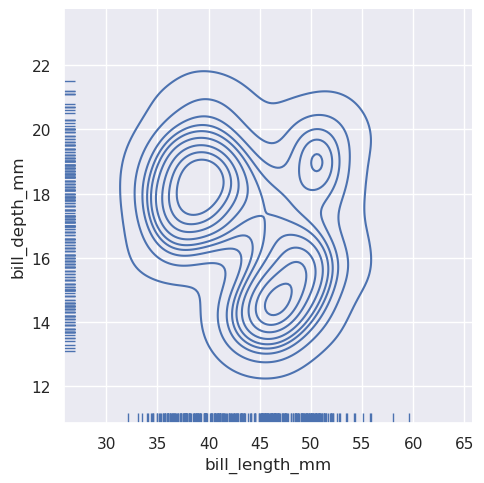

In [ ]:
# Create a kernel density estimate plot of bill length vs. bill depth with rug plot
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", #dataframe, x-axis column name, y-axis column name
    kind="kde", #specify that we want a KDE plot instead of a histogram
    rug=True #add rug plot at the margins, rather than adding marginal plots
)

And the axes-level `rugplot` function can be used to add rugs on the side of any other kind of plot:

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

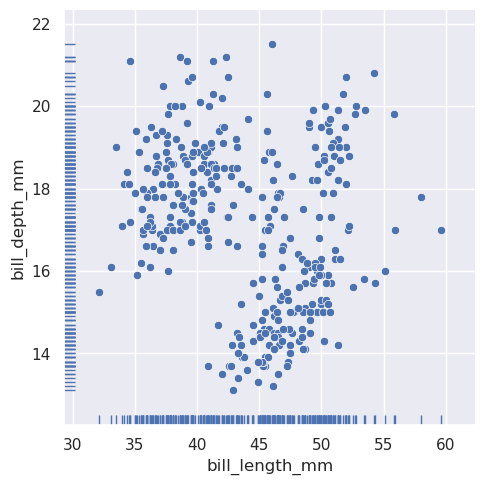

In [ ]:
#seaborn adds a rug plot to a relational plot. it knows to do this automatically
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

## Plotting many distributions

The `pairplot` function offers a similar blend of joint and marginal distributions. Rather than focusing on a single relationship, however, `pairplot` uses a "small-multiple" approach to visualize the univariate distribution of all variables in a dataset along with all of their pairwise relationships:

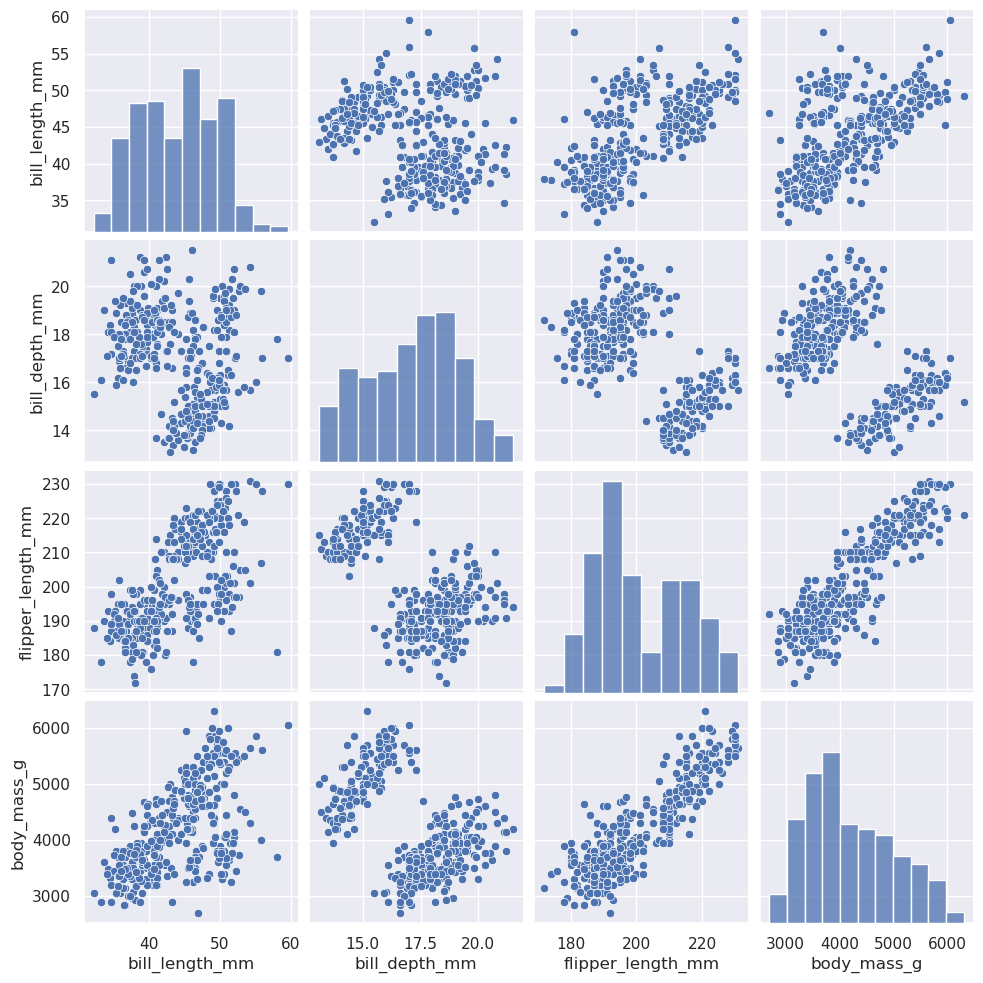

In [66]:
sns.pairplot(penguins,
            # hue="species", #different colors for different species
            #corner=True #only show lower triangle, prevent showing duplicate plots
            )

As with `jointplot`/`JointGrid`, using the underlying `PairGrid` directly will afford more flexibility with only a bit more typing:

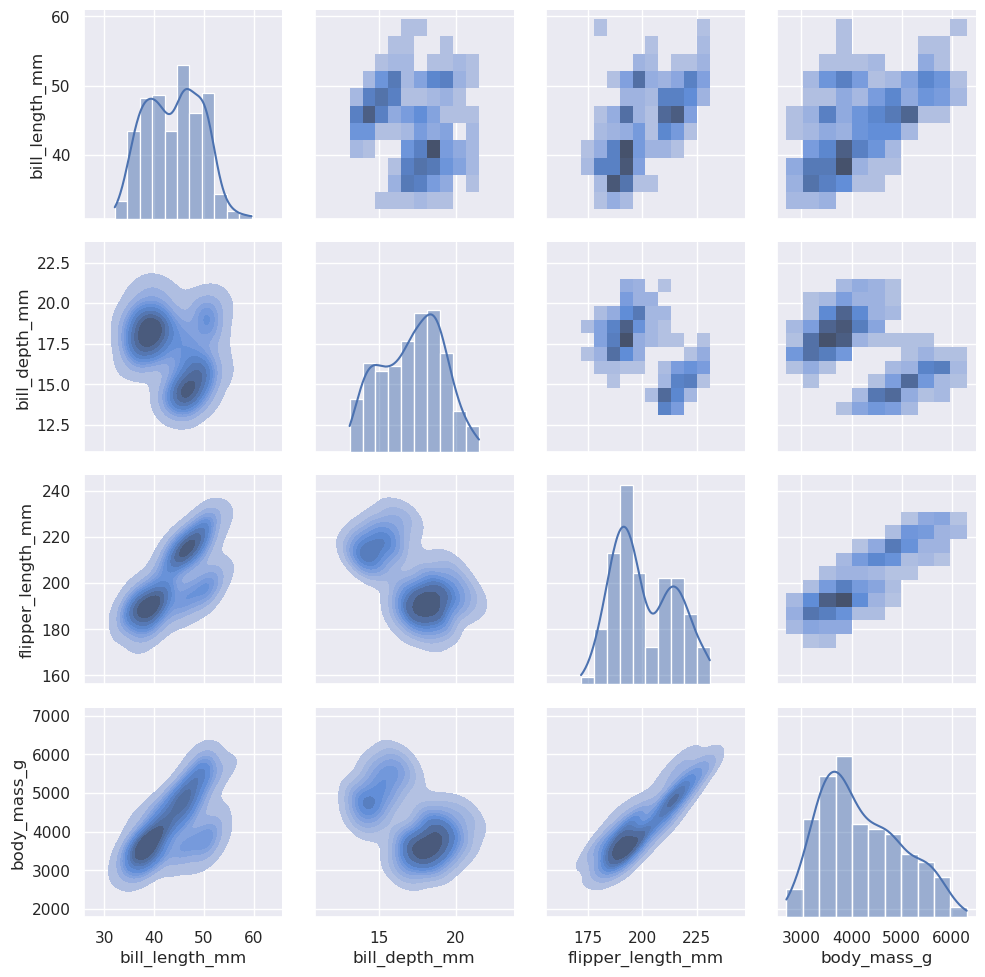

In [ ]:
# Create a PairGrid of the penguins dataset with customized upper, lower, and diagonal plots
g = sns.PairGrid(penguins) #establish the pairgrid plot, assign to g
g.map_upper(sns.histplot) #map the upper triangle to histograms
g.map_lower(sns.kdeplot, fill=True) #map the lower triangle to KDE plots with fill
g.map_diag(sns.histplot, kde=True) #map the diagonal to histograms with KDE overlay

Next we will explore visualizing [Categorical Data](./Mod6-categorical.ipynb)